In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
df=pd.read_csv('bank-additional-full.csv',sep=';')

In [3]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

In [8]:
numerical_cols = [col for col in numerical_cols if col != 'y']

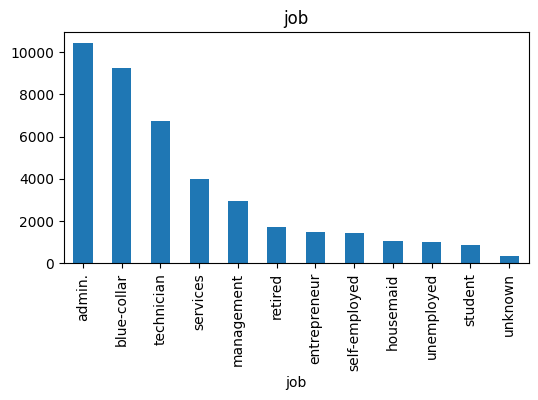

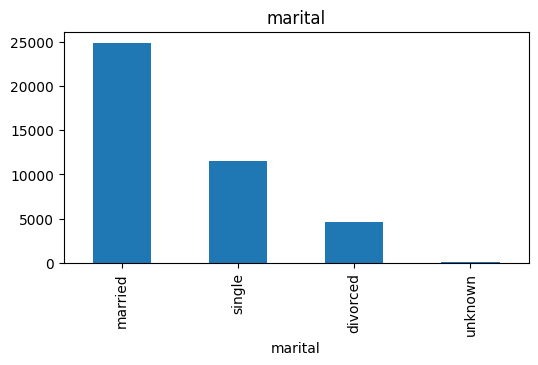

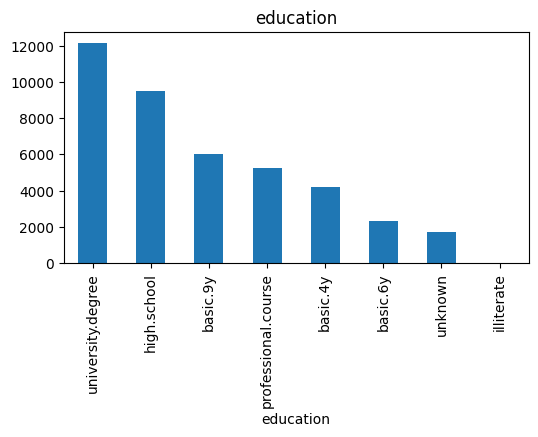

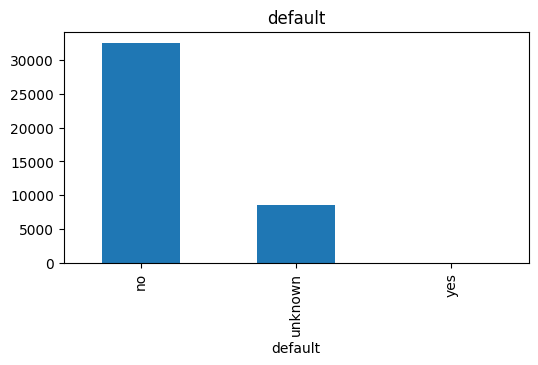

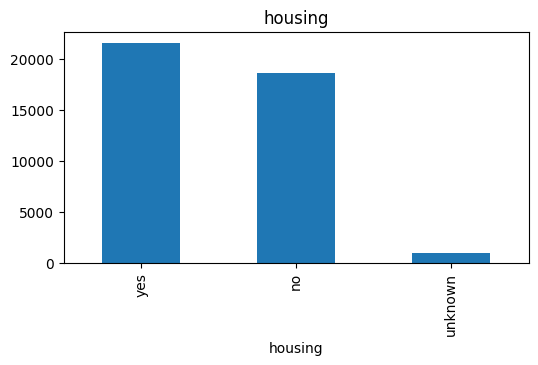

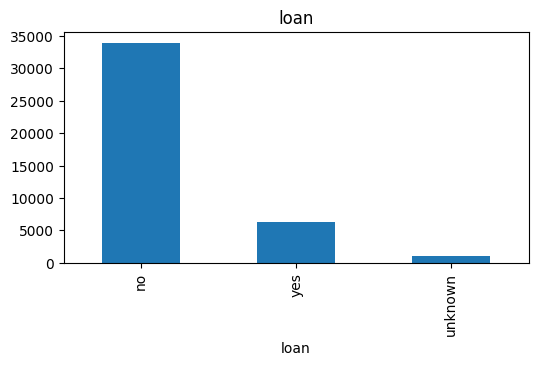

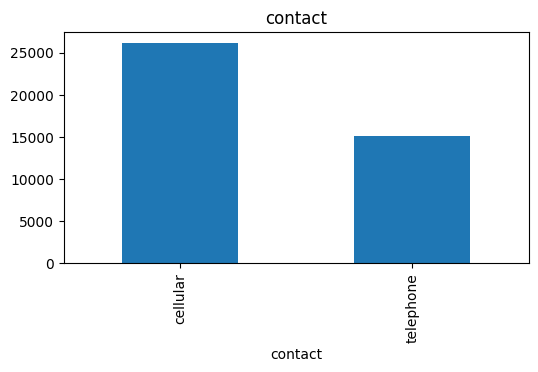

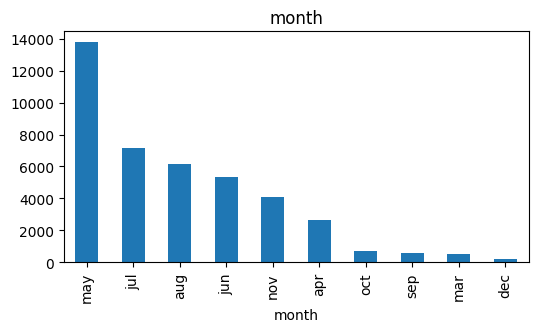

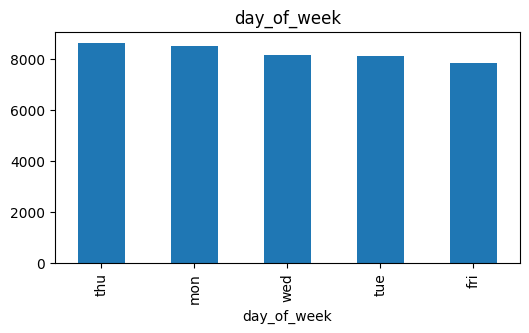

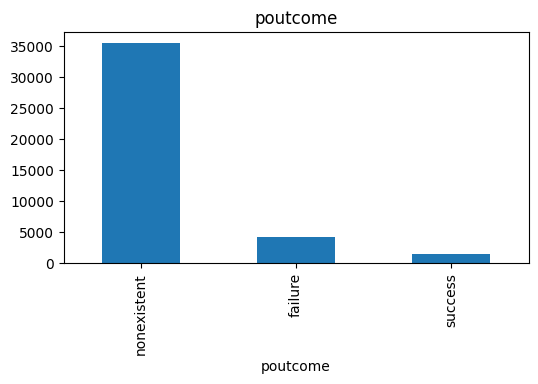

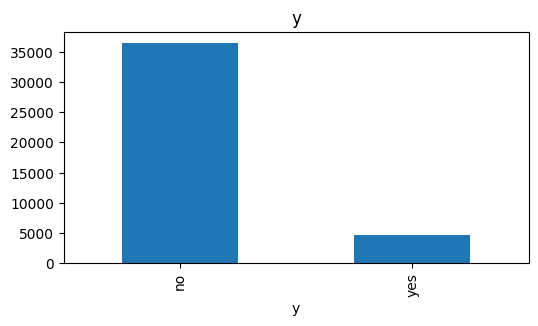

In [9]:
for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

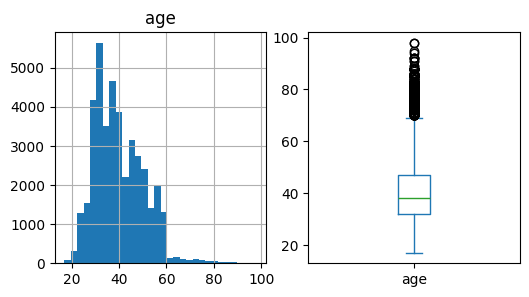

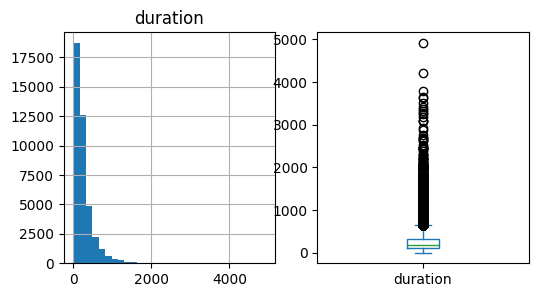

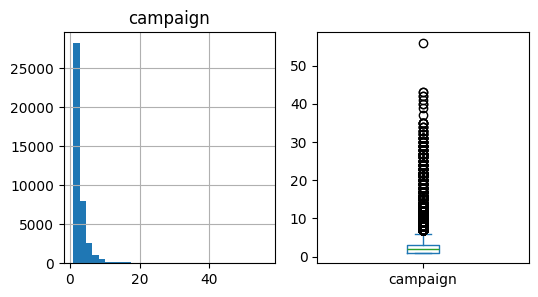

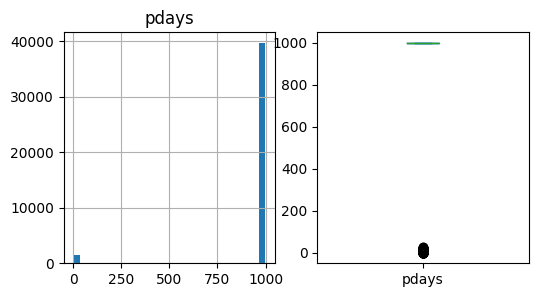

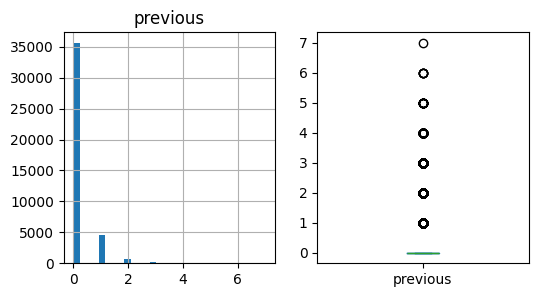

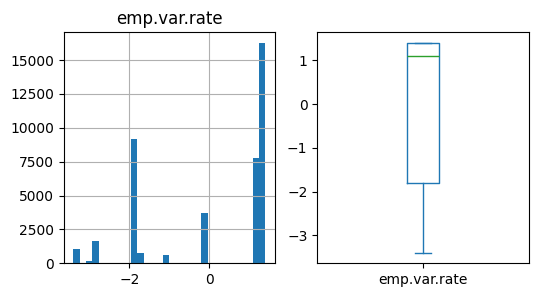

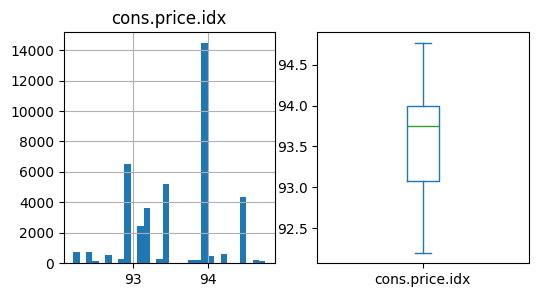

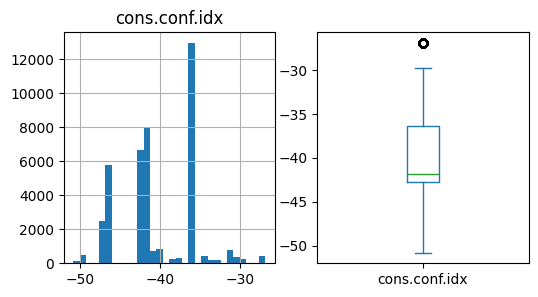

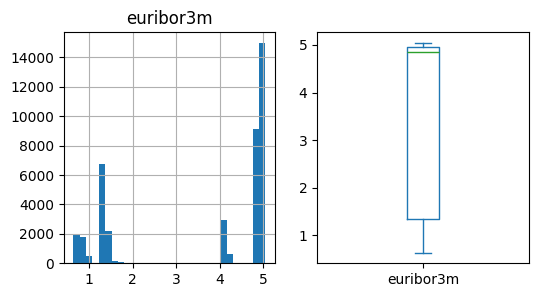

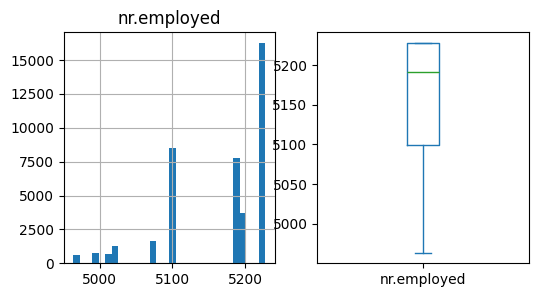

In [10]:
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    
    # Histogram
    plt.subplot(1, 2, 1)
    df[col].hist(bins=30)
    plt.title(col)
    
    # Box plot
    plt.subplot(1, 2, 2)
    df[col].plot(kind='box')
    
    plt.show()


In [11]:
df.drop(columns=['day_of_week'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   duration        41188 non-null  int64  
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [12]:
df = pd.get_dummies(df, columns=['job', 'marital', 'contact'], drop_first=True)
ordinal_mapping = {
    'education': {'basic.4y': -1, 'basic.6y': -1, 'basic.9y': -1, 'high.school': 1,
                  'illiterate': -2, 'professional.course': 1, 'university.degree': 2, 'unknown': 0},
    'month': {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
              'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12},
    'poutcome': {'failure': -1, 'nonexistent': 0, 'success': 1},
    'default': {'no': -1, 'yes': 1, 'unknown': 0},
    'housing': {'no': -1, 'yes': 1, 'unknown': 0},
    'loan': {'no': -1, 'yes': 1, 'unknown': 0}
}
for column, mapping in ordinal_mapping.items():
    df[column] = df[column].map(mapping)
df['y'] = df['y'].map({'no': 0, 'yes': 1})

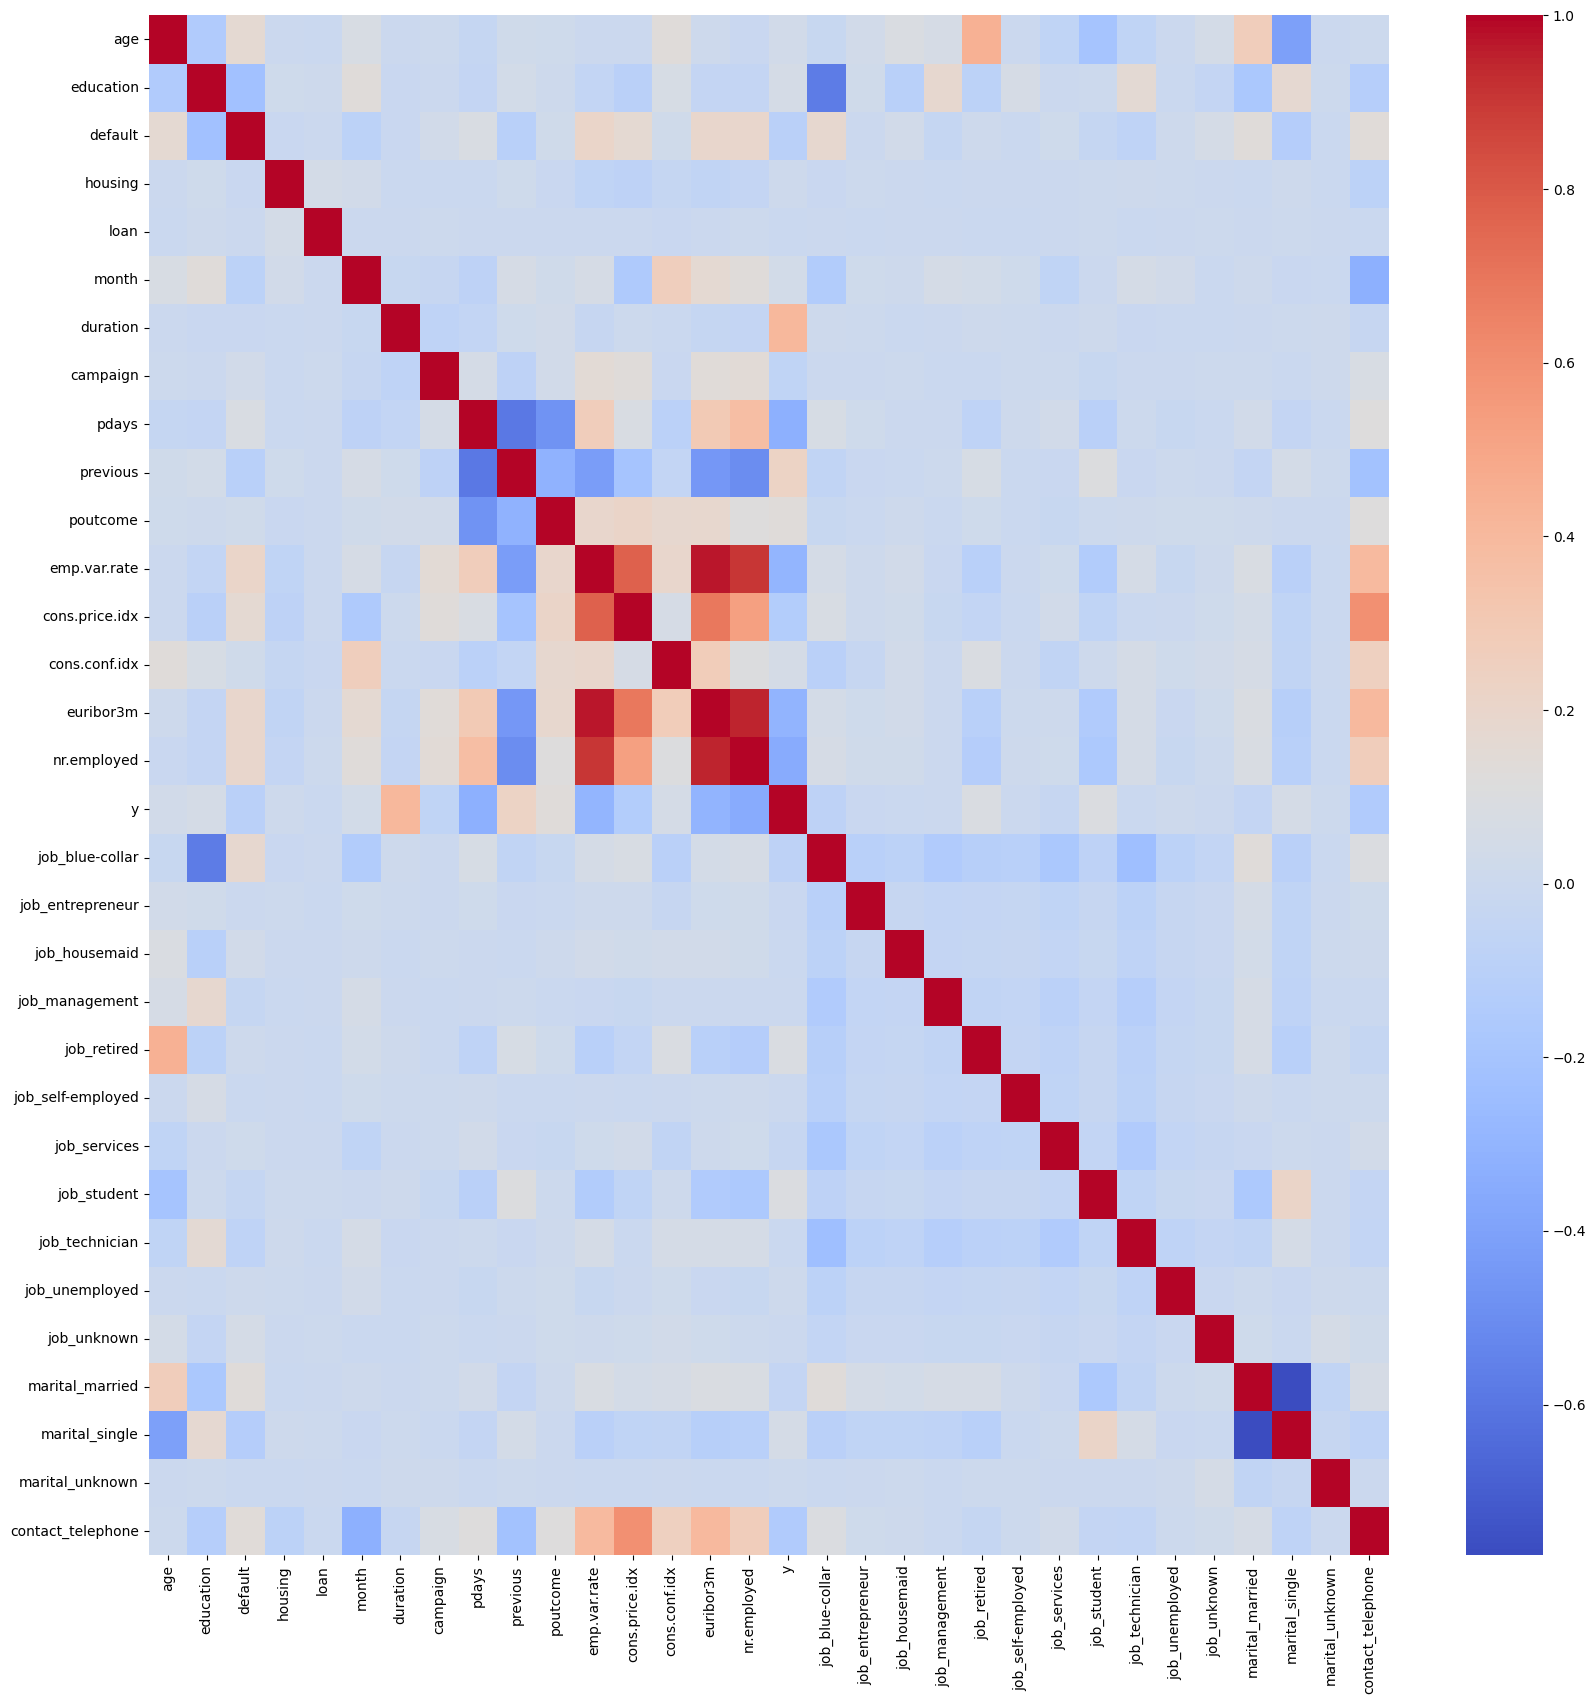

In [13]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='coolwarm')
plt.show()

In [14]:
numerical_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [15]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
df[numerical_cols]=pt.fit_transform(df[numerical_cols])

In [16]:
columns=df.drop('y',axis=1).columns

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[columns] = scaler.fit_transform(df[columns])

In [18]:
def cap_outliers(df, numerical_cols):
    df = df.copy()  # avoid modifying original dataframe
    
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define lower and upper caps
        lower_cap = Q1 - 1.5 * IQR
        upper_cap = Q3 + 1.5 * IQR
        
        # Cap values
        df[col] = df[col].clip(lower=lower_cap, upper=upper_cap)
    
    return df


In [19]:
df.columns

Index(['age', 'education', 'default', 'housing', 'loan', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'contact_telephone'],
      dtype='object')

In [20]:
df=cap_outliers(df,numerical_cols)

In [21]:
from sklearn.model_selection import train_test_split
X = df.drop('y', axis=1)  # Features
y = df['y']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [23]:
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam

In [24]:
def build_model(hp):
    model = Sequential()
    
    # Input + first hidden layer
    model.add(Dense(
        units=hp.Int('units_1', min_value=32, max_value=128, step=32),
        activation='relu',
        input_dim=X_train.shape[1]
    ))
    model.add(Dropout(hp.Float('dropout_1', 0.0, 0.5, step=0.1)))
    
    # Second hidden layer
    model.add(Dense(
        units=hp.Int('units_2', min_value=16, max_value=64, step=16),
        activation='relu'
    ))
    
    # Output layer
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(
        optimizer=Adam(
            learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model


In [25]:
tuner = kt.GridSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,      # number of different models to try
    executions_per_trial=1,
    directory='tuner_results',
    project_name='ann_optimization'
)

Reloading Tuner from tuner_results\ann_optimization\tuner0.json


In [26]:
tuner.search(X_train, y_train,
             epochs=10,
             batch_size=32,
             validation_data=(X_test, y_test))


In [27]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters:")
for key, value in best_hyperparameters.values.items():
    print(f"{key}: {value}")

c:\Users\Ashvitta\OneDrive\Desktop\gitprograms\Subcribption-prediction\venv\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Ashvitta\OneDrive\Desktop\gitprograms\Subcribption-prediction\venv\lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best Hyperparameters:
units_1: 32
dropout_1: 0.0
units_2: 32
learning_rate: 0.01


In [28]:
loss, acc = best_model.evaluate(X_test, y_test)
print(f"Best Model Accuracy: {acc:.4f}")

258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9144 - loss: 0.1890
Best Model Accuracy: 0.9144


In [29]:
loss, acc = best_model.evaluate(X_test, y_test)
print(f"Best Model Accuracy: {acc:.4f}")

258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9144 - loss: 0.1890
Best Model Accuracy: 0.9144


In [31]:
import pickle

# Save the model
best_model.save("ann_model.h5")

# Save preprocessing objects
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("pt.pkl", "wb") as f:
    pickle.dump(pt, f)

with open("columns.pkl", "wb") as f:
    pickle.dump(df.drop(columns='y').columns.tolist(), f)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_prob = best_model.predict(X_test)        # predicted probabilities (values between 0 and 1)
y_pred = (y_pred_prob > 0.5).astype(int)   # convert probabilities to 0 or 1
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix:
[[7035  268]
 [ 437  498]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.65      0.53      0.59       935

    accuracy                           0.91      8238
   macro avg       0.80      0.75      0.77      8238
weighted avg       0.91      0.91      0.91      8238


ROC-AUC Score: 0.939969436045988
